In [1]:
### This notebook analyze if the mutation is being made in cells in the cripresso analyzed sequencing data
# ABE (synonymous): A1, A2, A3, A4 -- ABE
# CBE (synonymous): C1, C2, C3, C4  
# ABE (non-synonymous):E1, E2, E3, E4, E5,E6,E7,E8 -- ABE
# CBE (non-synonymous): F1, F2, F3, F4 -- CBE_MIS

In [1]:
### Given the sgRNA name, this notebook mapps the sgRNA and find the before and after sequence 
import sys
sys.path.append('/storage/group/epo2/default/yur97/github/synSg/src')
### This notebook simply test if the be-hive model works on a single sequence
from confirm_ngs_mutation import *
from ast import literal_eval

import zipfile
import os
from os.path import join, exists
from os import listdir,walk, mkdir, rename, rmdir
import shutil
import re


In [2]:
input_path = '../../data/sequencing/singleSg/'
sg_Finder_path = '../../data/sg_Finder'

### Plot ABE variants

In [10]:
file_name = 'ABE'

crispresso_path = join(input_path, file_name, 'crispresso_out')

folder_list = [files for files in listdir(crispresso_path) if not (files.endswith('.html') or files.startswith('.') or files == 'allele_frequency')]
output_path = join(input_path, file_name, 'crispresso_out', 'allele_frequency')

# Iterate over each folder
for folders in folder_list:
    zipfpath = join(input_path, file_name, 'crispresso_out', folders, 'Alleles_frequency_table.zip')
    
    # Extract to a temporary directory
    temp_dir = join(input_path, file_name, 'crispresso_out', 'temp_extract')
    os.makedirs(temp_dir, exist_ok=True)
    
    with zipfile.ZipFile(zipfpath, 'r') as zip_ref:
        zip_ref.extractall(temp_dir)
    
    # Rename and move files to the output directory
    for filename in listdir(temp_dir):
        print(temp_dir)
        source = join(temp_dir, filename)
        new_filename = f"{folders}_{filename}"
        destination = join(output_path, new_filename)
        rename(source, destination)
    
    # Clean up the temporary directory
    rmdir(temp_dir)

../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_extract
../../data/sequencing/singleSg/ABE/crispresso_out/temp_

FileNotFoundError: [Errno 2] No such file or directory: '../../data/sequencing/singleSg/ABE/crispresso_out/allele_frequency_near_sg/Alleles_frequency_table.zip'

In [3]:
output_path_sg = join(input_path, file_name, 'crispresso_out', 'allele_frequency_near_sg')
if not exists(output_path_sg):
    mkdir(output_path_sg)
pattern = r'.*Alleles_frequency_table_around_sgRNA.*\.txt$'  # Correct regex pattern # A1_D17_1.Alleles_frequency_table_around_sgRNA_TGGAGTAGTAGCACTGGAGA.txt
regex = re.compile(pattern)
for folders in folder_list:
    af_fpath = join(input_path, file_name, 'crispresso_out', folders)
    for files in listdir(af_fpath):
        if regex.match(files):
            shutil.copy(join(input_path, file_name, 'crispresso_out', folders,files),
                       output_path_sg)

NameError: name 'file_name' is not defined

In [3]:
df_summ = pd.read_csv(join(input_path, 'ABE_detail.csv'), index_col = 0)
df_summ['edit_genome_pos'] = df_summ['edit_genome_pos'].apply(lambda x: literal_eval(str(x)))
info_file = pd.read_csv(join(input_path,'ABE','SampleInfo.csv'), index_col = 0) # Sequence information file
df_summ['sgRNA'] = df_summ['sgRNA'].apply(lambda x: x[1:] if x.startswith('g') else x)

dict_d5, dict_d17, samples = validate_edits(info_file,
              full_len_af_outpath = '../../data/sequencing/singleSg/ABE/crispresso_out/allele_frequency',
                sg_af_outpath = '../../data/sequencing/singleSg/ABE/crispresso_out/allele_frequency_near_sg',
                                  df_summ = df_summ)

filtered_dict_d5, filtered_dict_d17 = filter_dict(dict_d5, dict_d17)

Processing 15 samples...
Processing A1
All edits in A1_D5_1 are confirmed
All edits in A1_D5_2 are confirmed
All edits in A1_D5_3 are confirmed
Processing A3
All edits in A3_D5_1 are confirmed
All edits in A3_D5_2 are confirmed
All edits in A3_D5_3 are confirmed
Processing A5
All edits in A5_D5_1 are confirmed
All edits in A5_D5_2 are confirmed
All edits in A5_D5_3 are confirmed
Processing A2
All edits in A2_D5_1 are confirmed
All edits in A2_D5_2 are confirmed
All edits in A2_D5_3 are confirmed
Processing A4
All edits in A4_D5_1 are confirmed
All edits in A4_D5_2 are confirmed
All edits in A4_D5_3 are confirmed
Processing A6
All edits in A6_D5_1 are confirmed
All edits in A6_D5_2 are confirmed
All edits in A6_D5_3 are confirmed
Processing A7
All edits in A7_D5_1 are confirmed
All edits in A7_D5_2 are confirmed
All edits in A7_D5_3 are confirmed
Processing E2
All edits in E2_D5_1 are confirmed
All edits in E2_D5_2 are confirmed
All edits in E2_D5_3 are confirmed
Processing E4
All edits

In [6]:
df_d5 = get_edit_df(filtered_dict_d5)
df_d5.to_csv(f'../Analysis_output/singleSg_allelefreq/ABE_D5_singleSg_df.csv')
df_d17 = get_edit_df(filtered_dict_d17)
df_d17.to_csv(f'../Analysis_output/singleSg_allelefreq/ABE_D17_singleSg_df.csv')

In [ ]:
filtered_dict_d5

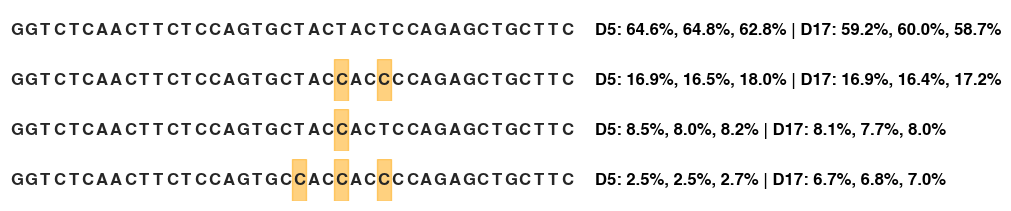

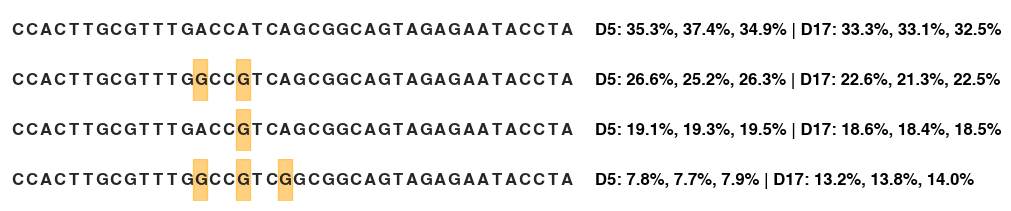

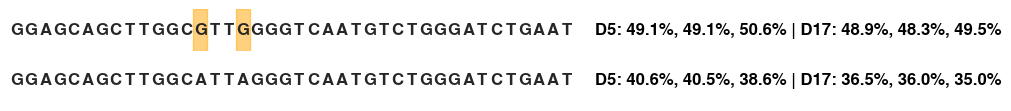

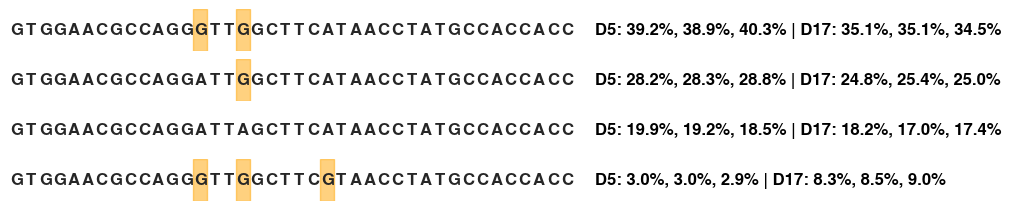

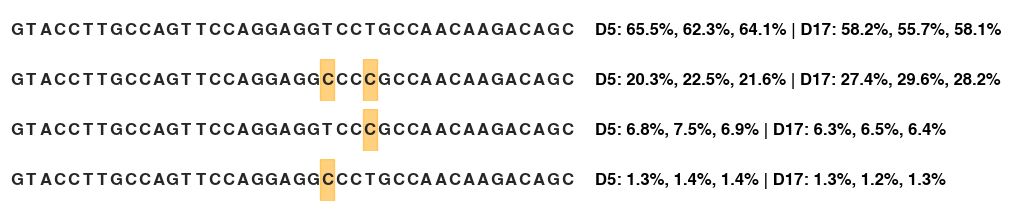

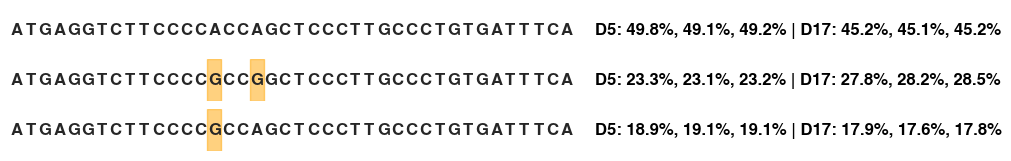

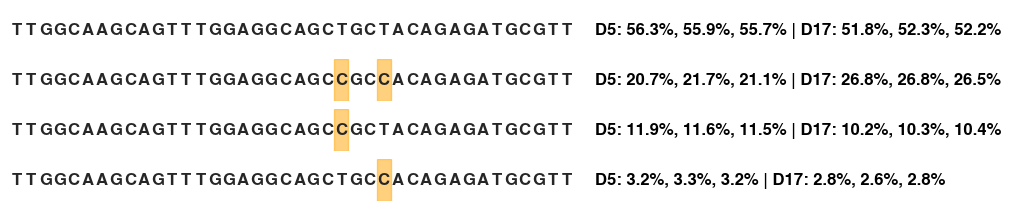

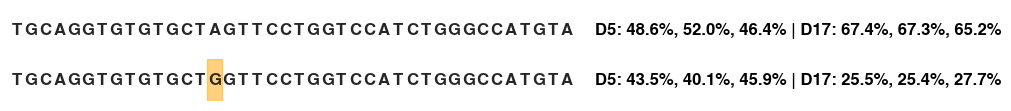

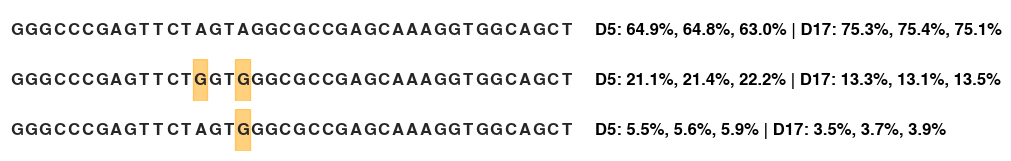

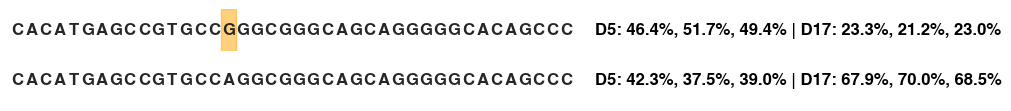

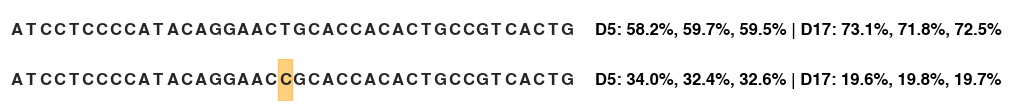

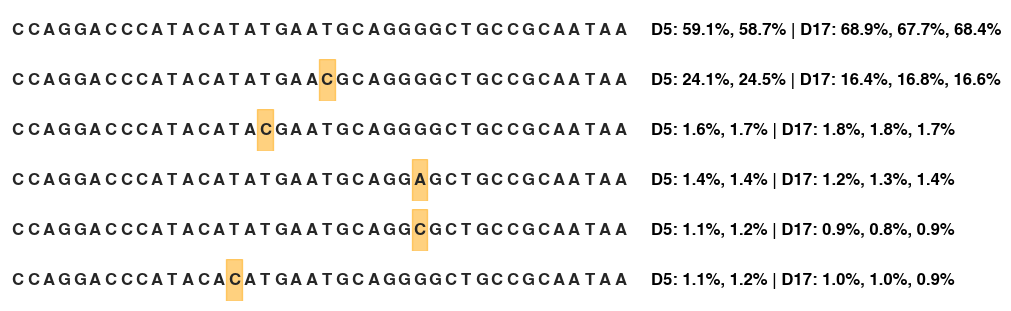

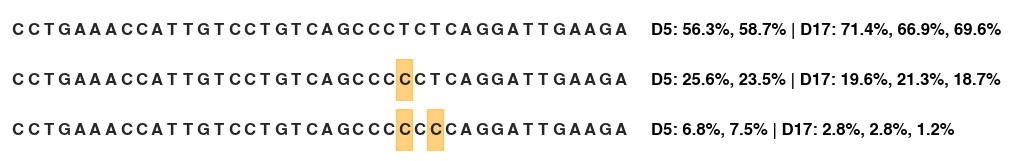

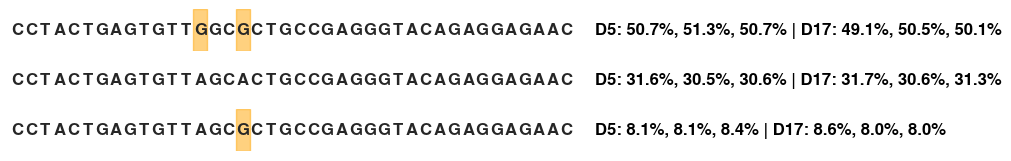

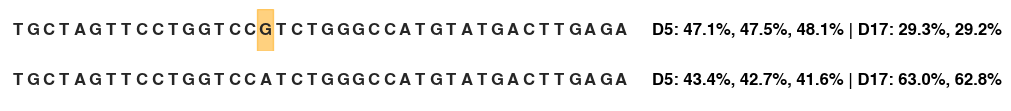

In [8]:
for name in samples:
    df_read = []
    
    d5_perc_reads = [filtered_dict_d5[name][rep]['%reads'] for rep in filtered_dict_d5[name].keys()]
    d5_read = list(map(list, zip(*d5_perc_reads)))
    
    d17_perc_reads = [filtered_dict_d17[name][rep]['%reads'] for rep in filtered_dict_d17[name].keys()]
    d17_read = list(map(list, zip(*d17_perc_reads)))

    plot_sequences_with_highlights_and_reads(filtered_dict_d5[name][2]['sequences'], filtered_dict_d5[name][2]['mutation_pos'],
                                            d5_read,d17_read)
    plt.savefig(f'../figure_output/singleSg_allelefreq/{name}_singleSg_sequence.png', transparent = True, dpi = 800)

### Plot CBE MIS

In [13]:
file_name = 'CBE_MIS'

crispresso_path = join(input_path, file_name, 'crispresso_out')

folder_list = [files for files in listdir(crispresso_path) if not (files.endswith('.html') or files.startswith('.') or files == 'allele_frequency')]
output_path = join(input_path, file_name, 'crispresso_out', 'allele_frequency')

# Iterate over each folder
for folders in folder_list:
    zipfpath = join(input_path, file_name, 'crispresso_out', folders, 'Alleles_frequency_table.zip')
    
    # Extract to a temporary directory
    temp_dir = join(input_path, file_name, 'crispresso_out', 'temp_extract')
    os.makedirs(temp_dir, exist_ok=True)
    
    with zipfile.ZipFile(zipfpath, 'r') as zip_ref:
        zip_ref.extractall(temp_dir)
    
    # Rename and move files to the output directory
    for filename in listdir(temp_dir):
        print(temp_dir)
        source = join(temp_dir, filename)
        new_filename = f"{folders}_{filename}"
        destination = join(output_path, new_filename)
        rename(source, destination)
    
    # Clean up the temporary directory
    rmdir(temp_dir)

../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract
../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract
../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract
../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract
../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract
../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract
../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract
../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract
../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract
../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract
../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract
../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract
../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract
../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract
../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_ext

FileNotFoundError: [Errno 2] No such file or directory: '../../data/sequencing/singleSg/CBE_MIS/crispresso_out/temp_extract/Alleles_frequency_table.zip'

In [16]:
output_path_sg = join(input_path, file_name, 'crispresso_out', 'allele_frequency_near_sg')
if not exists(output_path_sg):
    mkdir(output_path_sg)
pattern = r'.*Alleles_frequency_table_around_sgRNA.*\.txt$'  # Correct regex pattern # A1_D17_1.Alleles_frequency_table_around_sgRNA_TGGAGTAGTAGCACTGGAGA.txt
regex = re.compile(pattern)
for folders in folder_list:
    af_fpath = join(input_path, file_name, 'crispresso_out', folders)
    for files in listdir(af_fpath):
        if regex.match(files):
            shutil.copy(join(input_path, file_name, 'crispresso_out', folders,files),
                       output_path_sg)

In [7]:
df_summ = pd.read_csv(join(input_path, 'CBE_detail.csv'), index_col = 0)
df_summ['edit_genome_pos'] = df_summ['edit_genome_pos'].apply(lambda x: literal_eval(str(x)))

file_name = 'CBE_MIS'
info_file = pd.read_csv(join(input_path,file_name,'SampleInfo.csv'), index_col = 0) # Sequence information file
df_summ['sgRNA'] = df_summ['sgRNA'].apply(lambda x: x[1:] if x.startswith('g') else x)

dict_d5, dict_d17, samples = validate_edits(info_file,
              full_len_af_outpath = f'../../data/sequencing/singleSg/{file_name}/crispresso_out/allele_frequency',
                sg_af_outpath = f'../../data/sequencing/singleSg/{file_name}/crispresso_out/allele_frequency_near_sg',
                                  df_summ = df_summ)

filtered_dict_d5, filtered_dict_d17 = filter_dict(dict_d5, dict_d17)

Processing 5 samples...
Processing F1
All edits in F1_D5_1 are confirmed
All edits in F1_D5_3 are confirmed
Processing F2
All edits in F2_D5_1 are confirmed
All edits in F2_D5_2 are confirmed
All edits in F2_D5_3 are confirmed
Processing F3
All edits in F3_D5_1 are confirmed
All edits in F3_D5_2 are confirmed
All edits in F3_D5_3 are confirmed
Processing F4
All edits in F4_D5_1 are confirmed
All edits in F4_D5_2 are confirmed
All edits in F4_D5_3 are confirmed
Processing C2
All edits in C2_D5_1 are confirmed
All edits in C2_D5_2 are confirmed
All edits in C2_D5_3 are confirmed


In [8]:
df_d5 = get_edit_df(filtered_dict_d5)
df_d5.to_csv(f'../Analysis_output/singleSg_allelefreq/{file_name}_D5_singleSg_df.csv')
df_d17 = get_edit_df(filtered_dict_d17)
df_d17.to_csv(f'../Analysis_output/singleSg_allelefreq/{file_name}_D17_singleSg_df.csv')


In [7]:
# Ensure that the 'Predicted Edit' column is filled for all rows in each replicate
df['Predicted Edit'] = df.groupby(['Feature', 'Replicate'])['Predicted Edit'].transform(lambda x: x.fillna(method='ffill'))

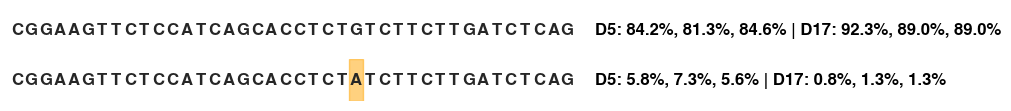

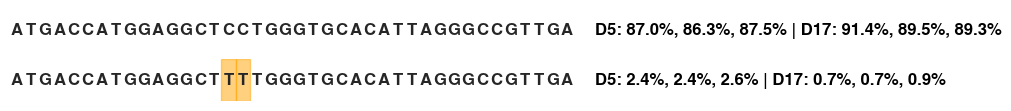

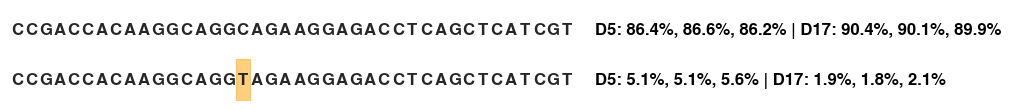

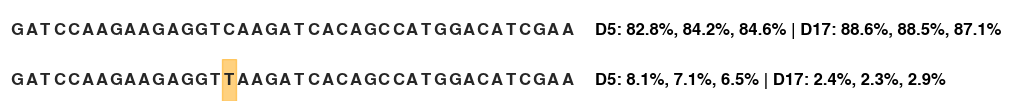

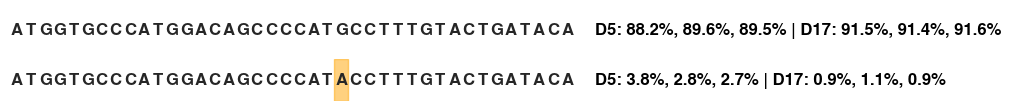

In [6]:
for name in samples:
    df_read = []
    
    d5_perc_reads = [filtered_dict_d5[name][rep]['%reads'] for rep in filtered_dict_d5[name].keys()]
    d5_read = list(map(list, zip(*d5_perc_reads)))
    
    d17_perc_reads = [filtered_dict_d17[name][rep]['%reads'] for rep in filtered_dict_d17[name].keys()]
    d17_read = list(map(list, zip(*d17_perc_reads)))

    plot_sequences_with_highlights_and_reads(filtered_dict_d5[name][2]['sequences'], filtered_dict_d5[name][2]['mutation_pos'],
                                            d5_read,d17_read)
    plt.savefig(f'../figure_output/singleSg_allelefreq/{name}_singleSg_sequence.png', transparent = True, dpi = 800)

### Plot CBE SYN

In [9]:
import zipfile
import os
from os.path import join, exists
from os import listdir,walk, mkdir, rename, rmdir
import shutil
import re

In [ ]:
file_name = 'CBE_SYN'

crispresso_path = join(input_path, file_name, 'crispresso_out')

folder_list = [files for files in listdir(crispresso_path) if not (files.endswith('.html') or files.startswith('.') or files == 'allele_frequency')]
output_path = join(input_path, file_name, 'crispresso_out', 'allele_frequency')

# Iterate over each folder
for folders in folder_list:
    zipfpath = join(input_path, file_name, 'crispresso_out', folders, 'Alleles_frequency_table.zip')
    
    # Extract to a temporary directory
    temp_dir = join(input_path, file_name, 'crispresso_out', 'temp_extract')
    os.makedirs(temp_dir, exist_ok=True)
    
    with zipfile.ZipFile(zipfpath, 'r') as zip_ref:
        zip_ref.extractall(temp_dir)
    
    # Rename and move files to the output directory
    for filename in listdir(temp_dir):
        print(temp_dir)
        source = join(temp_dir, filename)
        new_filename = f"{folders}_{filename}"
        destination = join(output_path, new_filename)
        rename(source, destination)
    
    # Clean up the temporary directory
    rmdir(temp_dir)

In [10]:
output_path_sg = join(input_path, file_name, 'crispresso_out', 'allele_frequency_near_sg')
if not exists(output_path_sg):
    mkdir(output_path_sg)
pattern = r'.*Alleles_frequency_table_around_sgRNA.*\.txt$'  # Correct regex pattern # A1_D17_1.Alleles_frequency_table_around_sgRNA_TGGAGTAGTAGCACTGGAGA.txt
regex = re.compile(pattern)
for folders in folder_list:
    af_fpath = join(input_path, file_name, 'crispresso_out', folders)
    for files in listdir(af_fpath):
        if regex.match(files):
            shutil.copy(join(input_path, file_name, 'crispresso_out', folders,files),
                       output_path_sg)

SameFileError: '../../data/sequencing/singleSg/CBE_SYN/crispresso_out/allele_frequency_near_sg/C1_D17_1.Alleles_frequency_table_around_sgRNA_AGGACCTGATACTAAACCCC.txt' and '../../data/sequencing/singleSg/CBE_SYN/crispresso_out/allele_frequency_near_sg/C1_D17_1.Alleles_frequency_table_around_sgRNA_AGGACCTGATACTAAACCCC.txt' are the same file

In [9]:
df_summ = pd.read_csv(join(input_path, 'CBE_detail.csv'), index_col = 0)
df_summ['edit_genome_pos'] = df_summ['edit_genome_pos'].apply(lambda x: literal_eval(str(x)))

file_name = 'CBE_SYN'
info_file = pd.read_csv(join(input_path,file_name,'SampleInfo.csv'), index_col = 0) # Sequence information file
df_summ['sgRNA'] = df_summ['sgRNA'].apply(lambda x: x[1:] if x.startswith('g') else x)

dict_d5, dict_d17, samples = validate_edits(info_file,
              full_len_af_outpath = f'../../data/sequencing/singleSg/{file_name}/crispresso_out/allele_frequency',
                sg_af_outpath = f'../../data/sequencing/singleSg/{file_name}/crispresso_out/allele_frequency_near_sg',
                                  df_summ = df_summ)

filtered_dict_d5, filtered_dict_d17 = filter_dict(dict_d5, dict_d17)

Processing 3 samples...
Processing C1
All edits in C1_D5_1 are confirmed
All edits in C1_D5_2 are confirmed
All edits in C1_D5_3 are confirmed
Processing C3
All edits in C3_D5_1 are confirmed
All edits in C3_D5_2 are confirmed
All edits in C3_D5_3 are confirmed
Processing C4
All edits in C4_D5_1 are confirmed
All edits in C4_D5_2 are confirmed
All edits in C4_D5_3 are confirmed


In [10]:
df_d5 = get_edit_df(filtered_dict_d5)
df_d5.to_csv(f'../Analysis_output/singleSg_allelefreq/{file_name}_D5_singleSg_df.csv')
df_d17 = get_edit_df(filtered_dict_d17)
df_d17.to_csv(f'../Analysis_output/singleSg_allelefreq/{file_name}_D17_singleSg_df.csv')

In [6]:
filtered_dict_d5

{'C1': {1: {'sequences': ['GGTGTGGCCAAGGACCTGATACTAAACCCCCGATCTGTGG'],
   '%reads': [93.35083800342257],
   'mutation_pos': [[]],
   'genome_pos': [[]],
   'predicted_pos': [70565428, 70565434, 70565435, 70565441]},
  2: {'sequences': ['GGTGTGGCCAAGGACCTGATACTAAACCCCCGATCTGTGG'],
   '%reads': [92.84856847188684],
   'mutation_pos': [[]],
   'genome_pos': [[]],
   'predicted_pos': [70565428, 70565434, 70565435, 70565441]},
  3: {'sequences': ['GGTGTGGCCAAGGACCTGATACTAAACCCCCGATCTGTGG'],
   '%reads': [93.65141361400046],
   'mutation_pos': [[]],
   'genome_pos': [[]],
   'predicted_pos': [70565428, 70565434, 70565435, 70565441]}},
 'C3': {1: {'sequences': ['GACTCGCCCTACGAAACTTTGCATTCTTTCATTAGCAATG'],
   '%reads': [93.54477698040934],
   'mutation_pos': [[]],
   'genome_pos': [[]],
   'predicted_pos': [101979421]},
  2: {'sequences': ['GACTCGCCCTACGAAACTTTGCATTCTTTCATTAGCAATG'],
   '%reads': [91.352640894749],
   'mutation_pos': [[]],
   'genome_pos': [[]],
   'predicted_pos': [101979421]

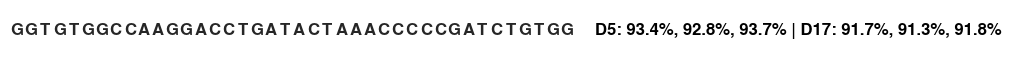

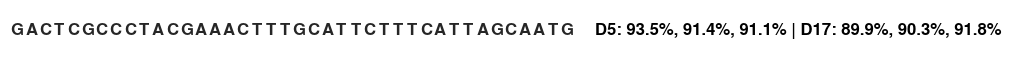

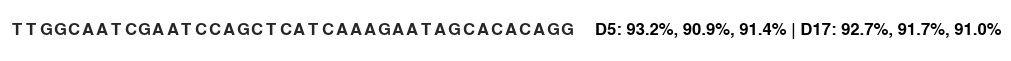

In [4]:
for name in samples:
    df_read = []
    
    d5_perc_reads = [filtered_dict_d5[name][rep]['%reads'] for rep in filtered_dict_d5[name].keys()]
    d5_read = list(map(list, zip(*d5_perc_reads)))
    
    d17_perc_reads = [filtered_dict_d17[name][rep]['%reads'] for rep in filtered_dict_d17[name].keys()]
    d17_read = list(map(list, zip(*d17_perc_reads)))

    plot_sequences_with_highlights_and_reads(filtered_dict_d5[name][2]['sequences'], filtered_dict_d5[name][2]['mutation_pos'],
                                            d5_read,d17_read)
    plt.savefig(f'../figure_output/singleSg_allelefreq/{name}_singleSg_sequence.png', transparent = True, dpi = 800)

### Plot WGS samples

In [ ]:
file_name = 'WGS'

crispresso_path = join(input_path, file_name, 'crispresso_out')

folder_list = [files for files in listdir(crispresso_path) if not (files.endswith('.html') or files.startswith('.') or files == 'allele_frequency')]
output_path = join(input_path, file_name, 'crispresso_out', 'allele_frequency')

# Iterate over each folder
for folders in folder_list:
    zipfpath = join(input_path, file_name, 'crispresso_out', folders, 'Alleles_frequency_table.zip')
    
    # Extract to a temporary directory
    temp_dir = join(input_path, file_name, 'crispresso_out', 'temp_extract')
    os.makedirs(temp_dir, exist_ok=True)
    
    with zipfile.ZipFile(zipfpath, 'r') as zip_ref:
        zip_ref.extractall(temp_dir)
    
    # Rename and move files to the output directory
    for filename in listdir(temp_dir):
        print(temp_dir)
        source = join(temp_dir, filename)
        new_filename = f"{folders}_{filename}"
        destination = join(output_path, new_filename)
        rename(source, destination)
    
    # Clean up the temporary directory
    rmdir(temp_dir)

In [17]:
output_path_sg = join(input_path, file_name, 'crispresso_out', 'allele_frequency_near_sg')
if not exists(output_path_sg):
    mkdir(output_path_sg)
pattern = r'.*Alleles_frequency_table_around_sgRNA.*\.txt$'  # Correct regex pattern # A1_D17_1.Alleles_frequency_table_around_sgRNA_TGGAGTAGTAGCACTGGAGA.txt
regex = re.compile(pattern)
for folders in folder_list:
    af_fpath = join(input_path, file_name, 'crispresso_out', folders)
    for files in listdir(af_fpath):
        if regex.match(files):
            shutil.copy(join(input_path, file_name, 'crispresso_out', folders,files),
                       output_path_sg)

In [3]:
df_summ = pd.read_csv(join(input_path, 'WGS_detail.csv'), index_col = 0)
df_summ['edit_genome_pos'] = df_summ['edit_genome_pos'].apply(lambda x: literal_eval(str(x)))

file_name = 'WGS'
info_file = pd.read_csv(join(input_path,file_name,'SampleInfo.csv'), index_col = 0) # Sequence information file
df_summ['sgRNA'] = df_summ['sgRNA'].apply(lambda x: x[1:] if x.startswith('g') else x)

dict_d5, dict_d17, samples = validate_edits(info_file,
              full_len_af_outpath = f'../../data/sequencing/singleSg/{file_name}/crispresso_out/allele_frequency',
                sg_af_outpath = f'../../data/sequencing/singleSg/{file_name}/crispresso_out/allele_frequency_near_sg',
                                  df_summ = df_summ)

filtered_dict_d5, filtered_dict_d17 = filter_dict(dict_d5, dict_d17)

Processing 3 samples...
Processing PSMB5
All edits in PSMB5_D5_1 are confirmed
All edits in PSMB5_D5_2 are confirmed
All edits in PSMB5_D5_3 are confirmed
Processing VARS1
All edits in VARS1_D5_1 are confirmed
Skipping VARS1_D5_2: Missing files
Processing CTU2
Skipping CTU2_D5_1: Missing files
All edits in CTU2_D5_2 are confirmed
All edits in CTU2_D5_3 are confirmed


In [4]:
df_d5 = get_edit_df(filtered_dict_d5)
df_d5.to_csv(f'../Analysis_output/singleSg_allelefreq/{file_name}_D5_singleSg_df.csv')
df_d17 = get_edit_df(filtered_dict_d17)
df_d17.to_csv(f'../Analysis_output/singleSg_allelefreq/{file_name}_D17_singleSg_df.csv')

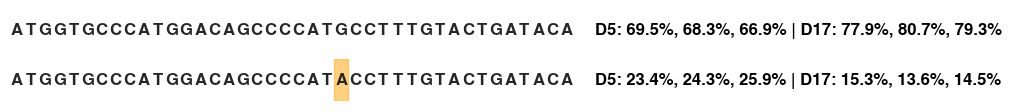

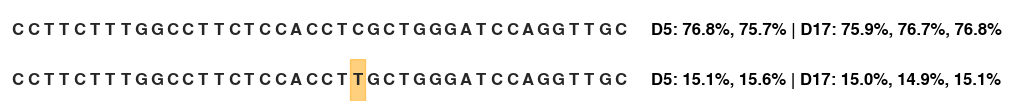

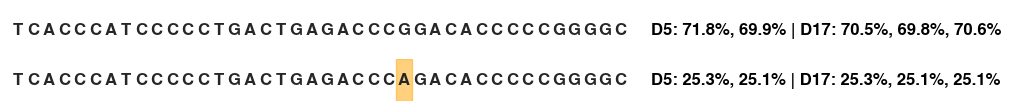

In [6]:
for name in samples:
    df_read = []
    
    d5_perc_reads = [filtered_dict_d5[name][rep]['%reads'] for rep in filtered_dict_d5[name].keys()]
    d5_read = list(map(list, zip(*d5_perc_reads)))
    
    d17_perc_reads = [filtered_dict_d17[name][rep]['%reads'] for rep in filtered_dict_d17[name].keys()]
    d17_read = list(map(list, zip(*d17_perc_reads)))

    plot_sequences_with_highlights_and_reads(filtered_dict_d5[name][3]['sequences'], filtered_dict_d5[name][3]['mutation_pos'],
                                            d5_read,d17_read)
    plt.savefig(f'../figure_output/singleSg_allelefreq/{name}_singleSg_sequence.png', transparent = True, dpi = 800)